# I. [demo] ImageFit Repeat Test

#### Here I've copied everything from [demo] ImageFit.ipynb and repeated with three sets of values for ['dx_gal'] and ['dy_gal']. 

Generalized imported functions:

In [1]:
#%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/GaussFit_spec2D.py
#%run /Users/hhg/Research/kinematic_lensing/code/BinnedFit/ChainTool.py

%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
import astropy.constants as constants

import sys
import os
dir_current = globals()['_dh'][0]
dir_repo = dir_current+'/../../..'
dir_BinnedFit = dir_repo+"/BinnedFit"
dir_KLens = dir_repo+"/KLens"

sys.path.append(dir_BinnedFit)
from binnedFit_utilities import *
from imageFit import ImageFit
from chainTool import ChainTool
from gen_mocks import gen_mock_tfCube

sys.path.append(dir_KLens)
from KLtool import *
from tfCube2 import GalaxyImage, TFCube

In [2]:
from chainconsumer import ChainConsumer

blue        = "#214F94"
red         = "#CC0204"
yellow      = "#FFA903"
gray        = "#858278"
black       = "#000000"
green       = "#73ab24"
purple      = "#8600C8"
lightblue   = "#6898FF"
lightblue2  = "#82b9e6"
yellowgreen = "#8dcd32" #"#8DE900"
lightteal   = "#7FC2BF"
teal        = "#51ABAE"
lightgray   = "#CDCDCD"

### A) Control: ['dx_gal'] = ['dy_gal'] = 0.0

In [3]:
###### set up parameters ######

line_species='Halpha'

pars0 = {}
pars0['g1'] = 0.0
pars0['g2'] = 0.0
pars0['sini'] = 0.5

pars0['redshift'] = 0.4

pars0['aspect'] = 0.2
pars0['r_hl_image'] = 0.5
pars0['r_hl_spec'] = 0.5

pars0['theta_int'] = 0. #np.pi/3.

pars0['slitWidth'] = 0.12
pars0['ngrid'] = 128

pars0['norm'] = 0.0

pars0['Resolution'] = 5000.
pars0['expTime'] = 60.*30. #60.*30.
pars0['pixScale'] = 0.1185
pars0['nm_per_pixel'] = 0.033
pars0['throughput'] = 0.29
pars0['psfFWHM'] = 0.5

pars0['area'] = 3.14 * (1000./2.)**2 

pars0['vcirc'] = 200.

linelist = np.empty(5,dtype=[('species',np.str_,16),
                                  ('lambda',np.float),
                                  ('flux',np.float)])
linelist['species'] = ['OIIa','OIIb','OIIIa','OIIIb','Halpha']
linelist['lambda'] =  [372.7092,372.9875,496.0295,500.8240,656.461]

fiber_SDSS = np.pi * 1.5**2
refSDSSspec = 3.*1e-17 * u.erg/u.second/u.Angstrom/u.cm**2
refSDSSspec = refSDSSspec.to(u.erg/u.second/u.nm/u.cm**2)

linelist['flux'] = refSDSSspec.value / fiber_SDSS  # [unit: erg/s/cm2/nm/arcsec2]

pars0['linelist'] = linelist

In [4]:
pars0['dx_gal'] = 0.0
pars0['dy_gal'] = 0.0

In [5]:
dataInfo = gen_mock_tfCube(pars0, 'Halpha', slits='major', noise_mode=0)

/Users/maggie/Documents/Research/GitHub/BinnedFit/notebooks/MS_notebooks/../../../BinnedFit/../TNGcube/TNGcube.py:834: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 324x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff50cf33250>)

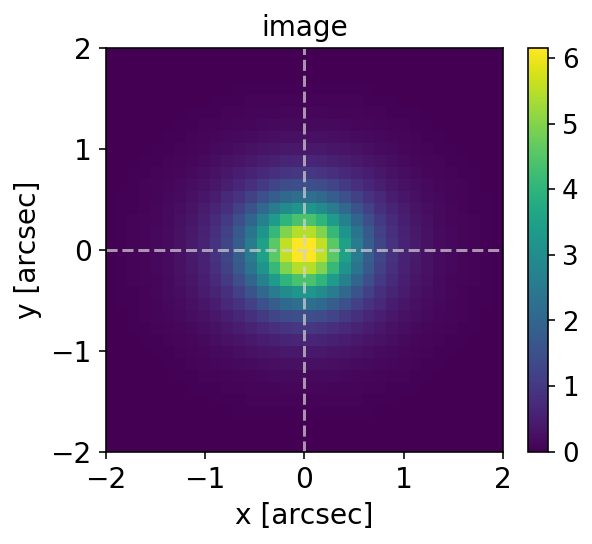

In [6]:
dataInfo['image'].display(xlim=[-2,2])

In [7]:
ImFit0 = ImageFit(image=dataInfo['image'], par_init = dataInfo['par_fid'])

In [8]:
#active_par_key=['sini', 'r_hl_image', 'theta_int', 'aspect', 'flux']
active_par_key=['sini', 'r_hl_image', 'theta_int', 'flux']

chainInfo0 = ImFit0.run_MCMC(Nwalker=50, Nsteps=1000, active_par_key=active_par_key, par_fix={'g1':0., 'g2':0.})

 31%|███       | 309/1000 [00:48<01:59,  5.80it/s]Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py", line 545, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/Users/maggie/Documents/Research/GitHub/BinnedFit/notebooks/MS_notebooks/../../../BinnedFit/imageFit.py", line 99, in cal_loglike
    modelImg = self.forward_model(pars)
  File "/Users/maggie/Documents/Research/GitHub/BinnedFit/notebooks/MS_notebooks/../../../BinnedFit/imageFit.py", line 55, in forward_model
    image = galObj.drawImage(image=image0)
  File "/opt/anaconda3/lib/python3.7/site-packages/galsim/gsobject.py", line 1692, in drawImage
    imview._shift(-image.center)  # equiv. to setCenter(0,0), but faster
  File "/opt/anaconda3/lib/python3.7/site-packages/galsim/image.py", line 1104, in _shift
    self.wcs = self.wcs.withOrigin(delta)
  File "/opt/anaconda3/lib/python3.7/site-packages/galsim/wcs.py", line 596, in withOrigin
    return self._with

emcee: Exception while calling your likelihood function:
  params: [4.98057007e-01 4.97591228e-01 1.04219155e-03 5.03679469e+02]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [ ]:
active_par_test = np.zeros(len(ImFit0.active_par_key))
for j, item in enumerate(ImFit0.active_par_key):
    active_par_test[j] = ImFit0.par_init[item]
active_par_test

In [ ]:
%time loglike = ImFit0.cal_loglike(active_par=active_par_test)
loglike

In [ ]:
Chain_Image0 = ChainTool(chainInfo0, Nburn=25000, Nend=50000)

In [ ]:
Chain_Image0.par_bestfit(select_par_key=active_par_key, statistics='max', mode=0)

In [ ]:
Chain_Image0.par_maxlike(select_par_key=['flux'])

In [ ]:
Nchains = 1
colors = [gray, lightblue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '--', "--", "-.", '-', ":", "--", ':']

statistics="max"

#select_par_key = ['sini','r_hl_image','theta_int', 'aspect','flux']
select_par_key = ['sini','r_hl_image','theta_int','flux']


parID1,parName1,par_x1 = Chain_Image0.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain_Image0.chain[:, parID1], parameters=parName1 ,name="$\mathrm{chain1}$")


c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=22,tick_font_size=22
            ,colors=colors
            ,shade=[False]*Nchains
            ,statistics=statistics,summary=True
            ,linestyles=lines
            ,shade_gradient=[0]*Nchains
            ,bar_shade=[True]*Nchains,
           usetex=False)

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
truth_pt = [Chain_Image0.par_fid[item] for item in ImFit0.active_par_key]
fig = c.plotter.plot(legend=True, truth=truth_pt) #, truth=par_x1

fig.subplots_adjust(left=0.12, right=0.99, bottom=0.11, top=0.99)

fig.set_size_inches(2 + fig.get_size_inches())
fig.savefig("fig1.pdf", transparent=True)

### B) X Test: ['dx_gal'] = 0.5; ['dy_gal'] = 0.0

In [9]:
parsx = pars0.copy() 
#This is a trick I learned from Eric to prevent the dictionaries from talking to each other

In [10]:
parsx['dx_gal'] = 0.5
parsx['dy_gal'] = 0.0

In [11]:
dataInfox = gen_mock_tfCube(parsx, 'Halpha', slits='major', noise_mode=0)

(<Figure size 324x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff50dceae10>)

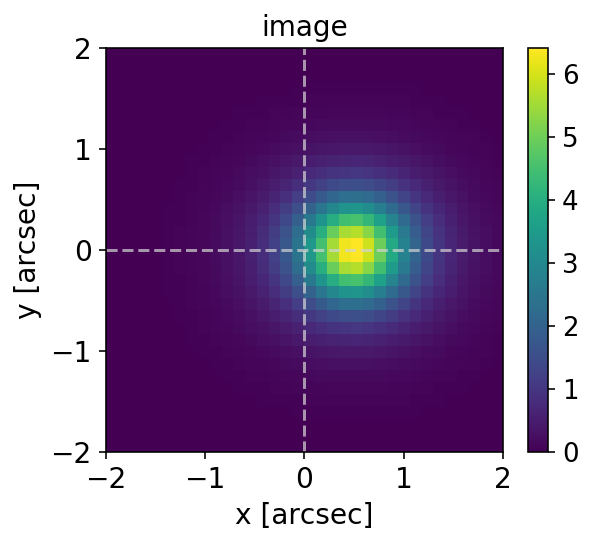

In [12]:
dataInfox['image'].display(xlim=[-2,2])

In [13]:
ImFitx = ImageFit(image=dataInfox['image'], par_init = dataInfox['par_fid'])

In [14]:
#active_par_key=['sini', 'r_hl_image', 'theta_int', 'aspect', 'flux']
active_par_key=['sini', 'r_hl_image', 'theta_int', 'flux', 'dx_gal', 'dy_gal']

chainInfox = ImFitx.run_MCMC(Nwalker=50, Nsteps=1000, active_par_key=active_par_key, par_fix={'g1':0., 'g2':0.})

100%|██████████| 1000/1000 [02:29<00:00,  6.70it/s]

Total MCMC time (mins): 2.488825833797455


In [15]:
active_par_test = np.zeros(len(ImFitx.active_par_key))
for j, item in enumerate(ImFitx.active_par_key):
    active_par_test[j] = ImFitx.par_init[item]
active_par_test

array([5.00000000e-01, 5.00000000e-01, 0.00000000e+00, 5.33005905e+02,
       5.00000000e-01, 0.00000000e+00])

In [16]:
%time loglike = ImFitx.cal_loglike(active_par=active_par_test)
loglike

CPU times: user 2.93 ms, sys: 625 µs, total: 3.55 ms
Wall time: 4.18 ms


-0.0

In [17]:
Chain_Imagex = ChainTool(chainInfox, Nburn=25000, Nend=50000)

In [18]:
Chain_Imagex.par_bestfit(select_par_key=active_par_key, statistics='max', mode=0)

{'sini': [0.434431681809532, 0.4894997615614088, 0.5437935976612382],
 'r_hl_image': [0.486422161430278, 0.4949602286845212, 0.5096182392503723],
 'theta_int': [-0.13730877849911516,
  -0.004024632849397858,
  0.10790119053903968],
 'flux': [523.642300000878, 532.799261277681, 540.8958631014216],
 'dx_gal': [0.4895747344467167, 0.4984074419741343, 0.5052331675886854],
 'dy_gal': [-0.05602838428907014, 0.004382347884543558, 0.06742403321814716]}

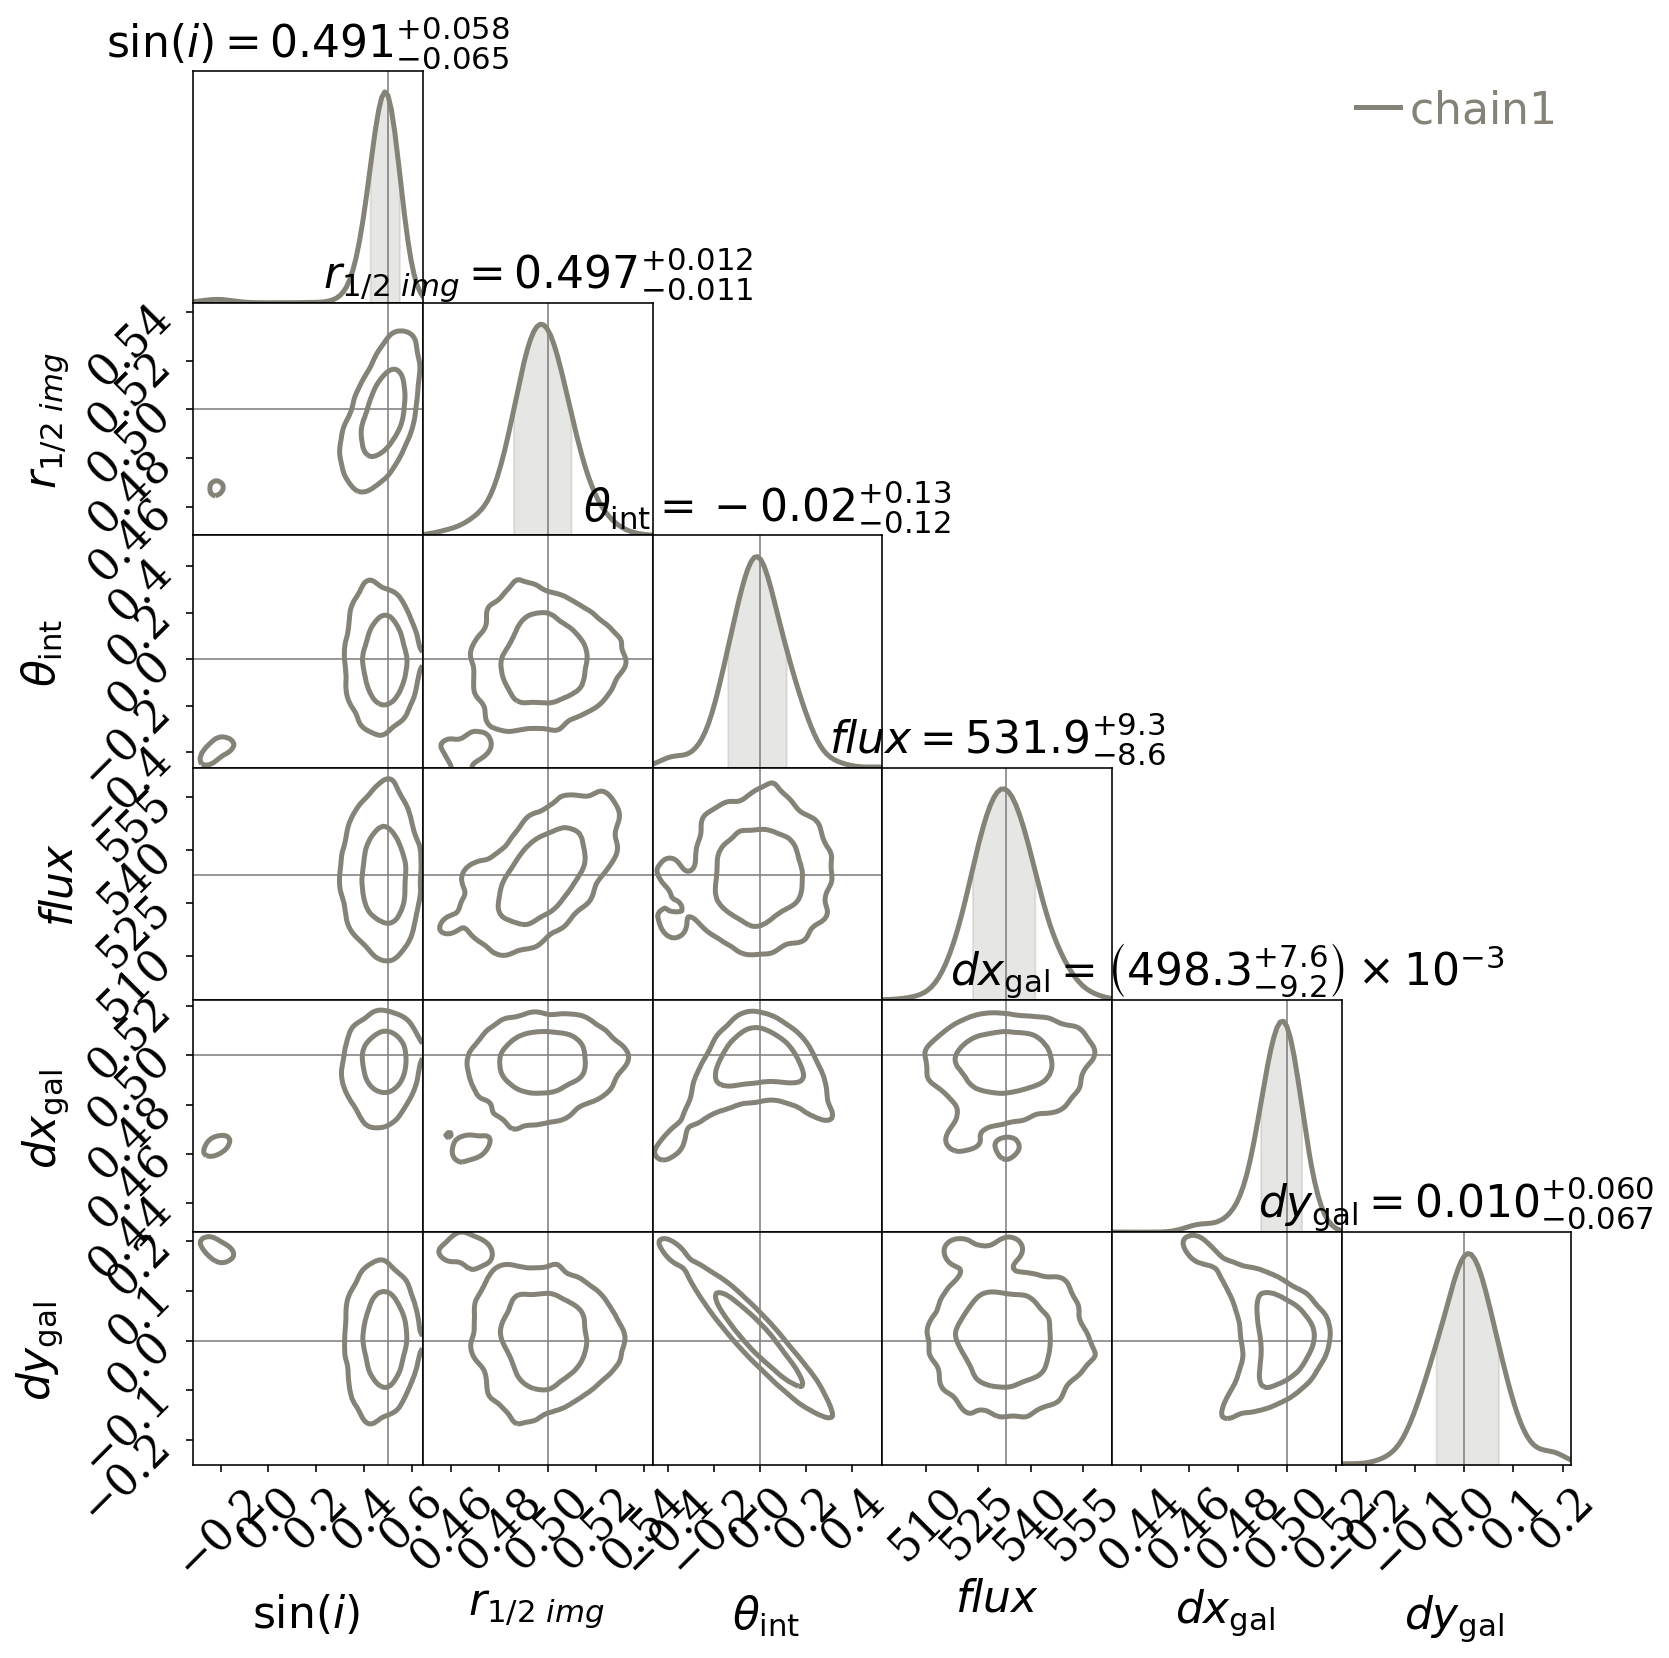

In [19]:
Nchains = 1
colors = [gray, lightblue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '--', "--", "-.", '-', ":", "--", ':']

statistics="max"

#select_par_key = ['sini','r_hl_image','theta_int', 'aspect','flux']
select_par_key = ['sini','r_hl_image','theta_int','flux', 'dx_gal', 'dy_gal']


parID1,parName1,par_x1 = Chain_Imagex.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain_Imagex.chain[:, parID1], parameters=parName1 ,name="$\mathrm{chain1}$")


c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=22,tick_font_size=22
            ,colors=colors
            ,shade=[False]*Nchains
            ,statistics=statistics,summary=True
            ,linestyles=lines
            ,shade_gradient=[0]*Nchains
            ,bar_shade=[True]*Nchains,
           usetex=False)

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
truth_pt = [Chain_Imagex.par_fid[item] for item in ImFitx.active_par_key]
fig = c.plotter.plot(legend=True, truth=truth_pt) #, truth=par_x1

fig.subplots_adjust(left=0.12, right=0.99, bottom=0.11, top=0.99)

fig.set_size_inches(2 + fig.get_size_inches())
fig.savefig("fig1.pdf", transparent=True)

### C) Y Test: ['dx_gal'] = 0.0; ['dy_gal'] = 0.5

In [11]:
parsy = pars0.copy()

In [12]:
parsy['dx_gal'] = 0.0
parsy['dy_gal'] = 0.5

In [13]:
dataInfoy = gen_mock_tfCube(parsy, 'Halpha', slits='major', noise_mode=0)

(<Figure size 324x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc484a2c3d0>)

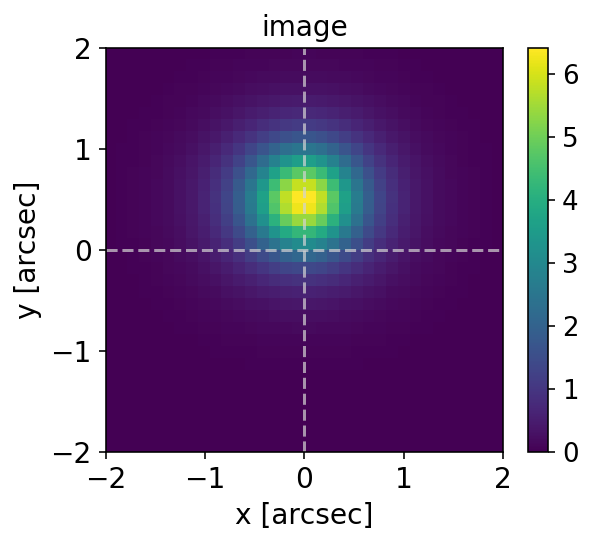

In [14]:
dataInfoy['image'].display(xlim=[-2,2])

In [47]:
ImFity = ImageFit(image=dataInfoy['image'], par_init = dataInfoy['par_fid'])

In [48]:
#active_par_key=['sini', 'r_hl_image', 'theta_int', 'aspect', 'flux']
active_par_key=['sini', 'r_hl_image', 'theta_int', 'flux', 'dx_gal', 'dy_gal']

chainInfoy = ImFity.run_MCMC(Nwalker=50, Nsteps=1000, active_par_key=active_par_key, par_fix={'g1':0., 'g2':0.})

100%|██████████| 1000/1000 [01:30<00:00, 11.09it/s]

Total MCMC time (mins): 1.5049111684163412


In [49]:
active_par_test = np.zeros(len(ImFity.active_par_key))
for j, item in enumerate(ImFity.active_par_key):
    active_par_test[j] = ImFity.par_init[item]
active_par_test

array([5.00000000e-01, 5.00000000e-01, 0.00000000e+00, 5.31717777e+02,
       0.00000000e+00, 5.00000000e-01])

In [50]:
%time loglike = ImFity.cal_loglike(active_par=active_par_test)
loglike

CPU times: user 3.34 ms, sys: 1.67 ms, total: 5.01 ms
Wall time: 3.91 ms


-0.0

In [51]:
Chain_Imagey = ChainTool(chainInfoy, Nburn=25000, Nend=50000)

In [52]:
Chain_Imagey.par_bestfit(select_par_key=active_par_key, statistics='max', mode=0)

{'sini': [0.4355488293221446, 0.49179021043071014, 0.5444655619400006],
 'r_hl_image': [0.4857570573422977, 0.49824945462038667, 0.5109969783217606],
 'theta_int': [-0.126529535790793, -0.0005663875733107893, 0.1015685669860763],
 'flux': [522.8596570251517, 531.0214018357609, 541.0875537688456],
 'dx_gal': [-0.0629762914109355, 0.002184999193857201, 0.05186435909856385],
 'dy_gal': [0.4902508692952151, 0.49762704213417064, 0.5042122966733781]}

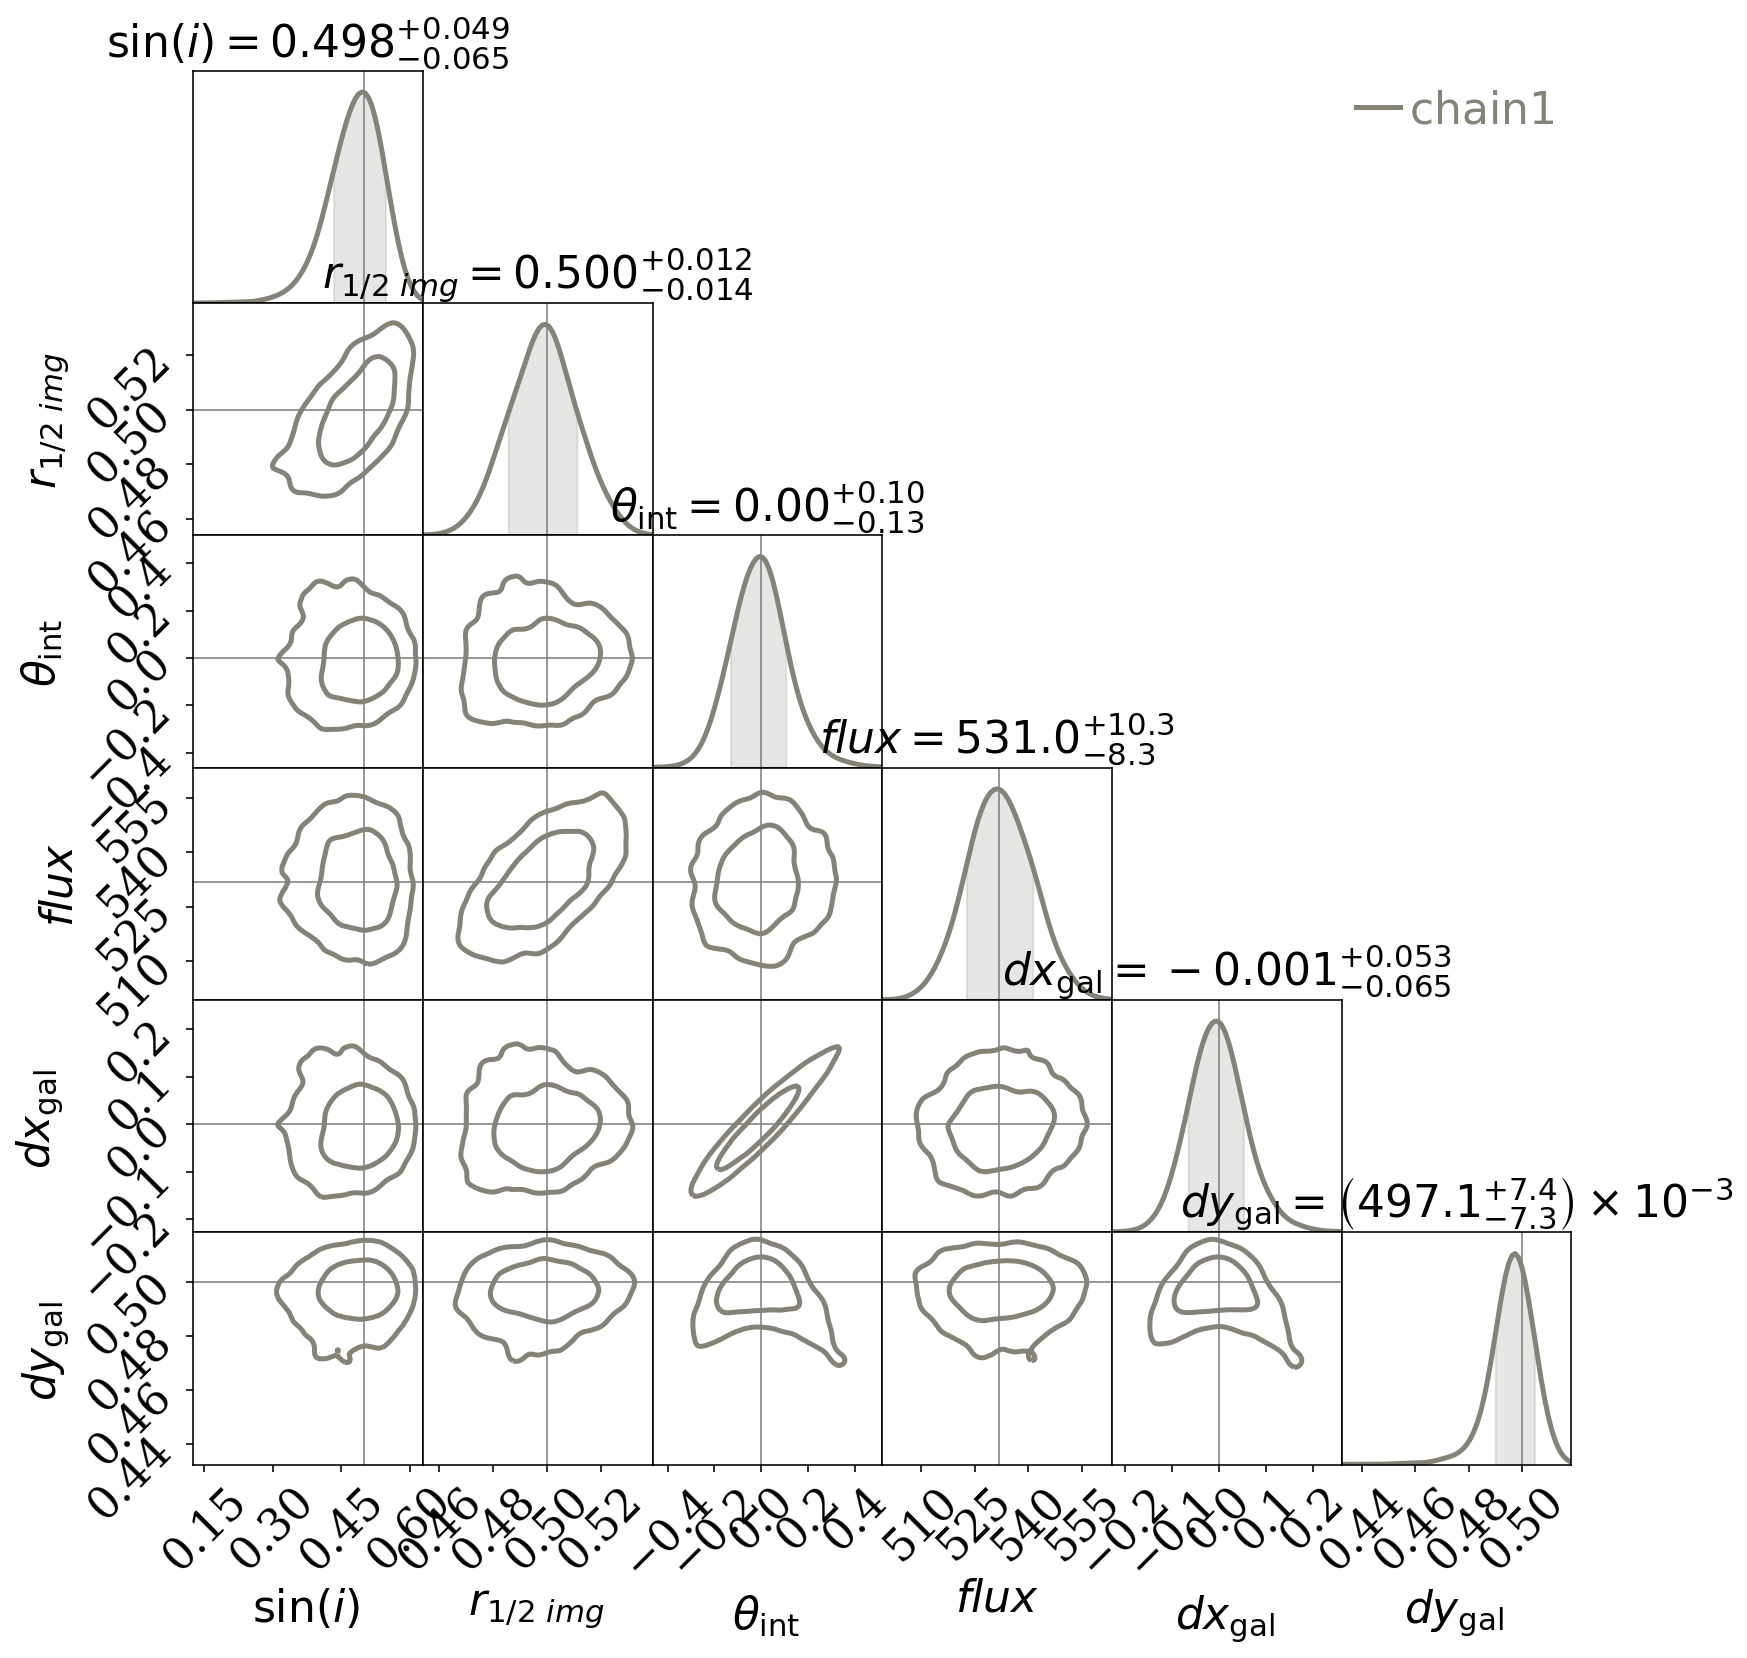

In [53]:
Nchains = 1
colors = [gray, lightblue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '--', "--", "-.", '-', ":", "--", ':']

statistics="max"

#select_par_key = ['sini','r_hl_image','theta_int', 'aspect','flux']
select_par_key = ['sini','r_hl_image','theta_int','flux', 'dx_gal', 'dy_gal']


parID1,parName1,par_x1 = Chain_Imagey.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain_Imagey.chain[:, parID1], parameters=parName1 ,name="$\mathrm{chain1}$")


c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=22,tick_font_size=22
            ,colors=colors
            ,shade=[False]*Nchains
            ,statistics=statistics,summary=True
            ,linestyles=lines
            ,shade_gradient=[0]*Nchains
            ,bar_shade=[True]*Nchains,
           usetex=False)

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
truth_pt = [Chain_Imagey.par_fid[item] for item in ImFity.active_par_key]
fig = c.plotter.plot(legend=True, truth=truth_pt) #, truth=par_x1

fig.subplots_adjust(left=0.12, right=0.99, bottom=0.11, top=0.99)

fig.set_size_inches(2 + fig.get_size_inches())
fig.savefig("fig1.pdf", transparent=True)

Both tests have been passed; the code correctly found the values of dx_gal and dy_gal.

# II. Tests of ImFit.forward_model 

This is the function where I changed the 'subgridpix' parameter.

In [20]:
pars_shift = pars0.copy()

In [21]:
pars_shift['dx_gal'] = 0.0
pars_shift['dy_gal'] = 0.5

In [22]:
dataInfo_shift = gen_mock_tfCube(pars_shift,'Halpha', slits='major', noise_mode=0)

/Users/maggie/Documents/Research/GitHub/BinnedFit/notebooks/MS_notebooks/../../../BinnedFit/../TNGcube/TNGcube.py:834: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 324x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff50fd35190>)

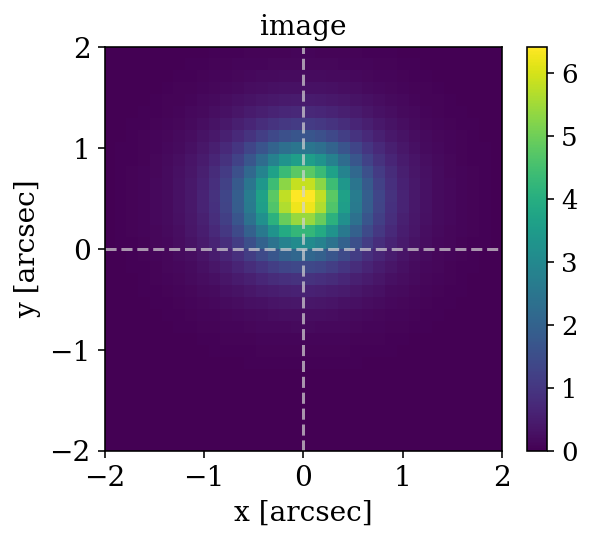

In [23]:
dataInfo_shift['image'].display(xlim=[-2,2])

In [24]:
ImFit_shift = ImageFit(image=dataInfo_shift['image'], par_init = dataInfo_shift['par_fid'])

In [25]:
pars_forward = pars_shift.copy()

In [26]:
pars_forward['dx_gal'] = 0.5
pars_forward['dy_gal'] = 0.0

In [27]:
dir_TNG = dir_repo+'/TNGcube'
sys.path.append(dir_TNG)
from TNGcube import Image

In [28]:
forImg_shift = Image(ImFit_shift.forward_model(pars_forward), dataInfo_shift['spaceGrid'])

In [29]:
?? ImFit_shift.forward_model

(<Figure size 324x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff4f5508b90>)

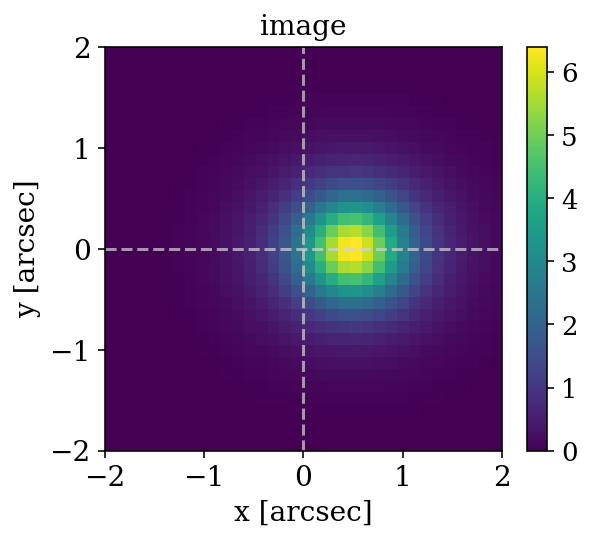

In [30]:
forImg_shift.display(xlim=[-2,2])

ImFit.forward_model has correctly implemented the units; the galaxy is located at x = 0.5 arcsec. To confirm that this is using the code with my modification, I took a screenshot from the Jupyter interface of the code called. See below.

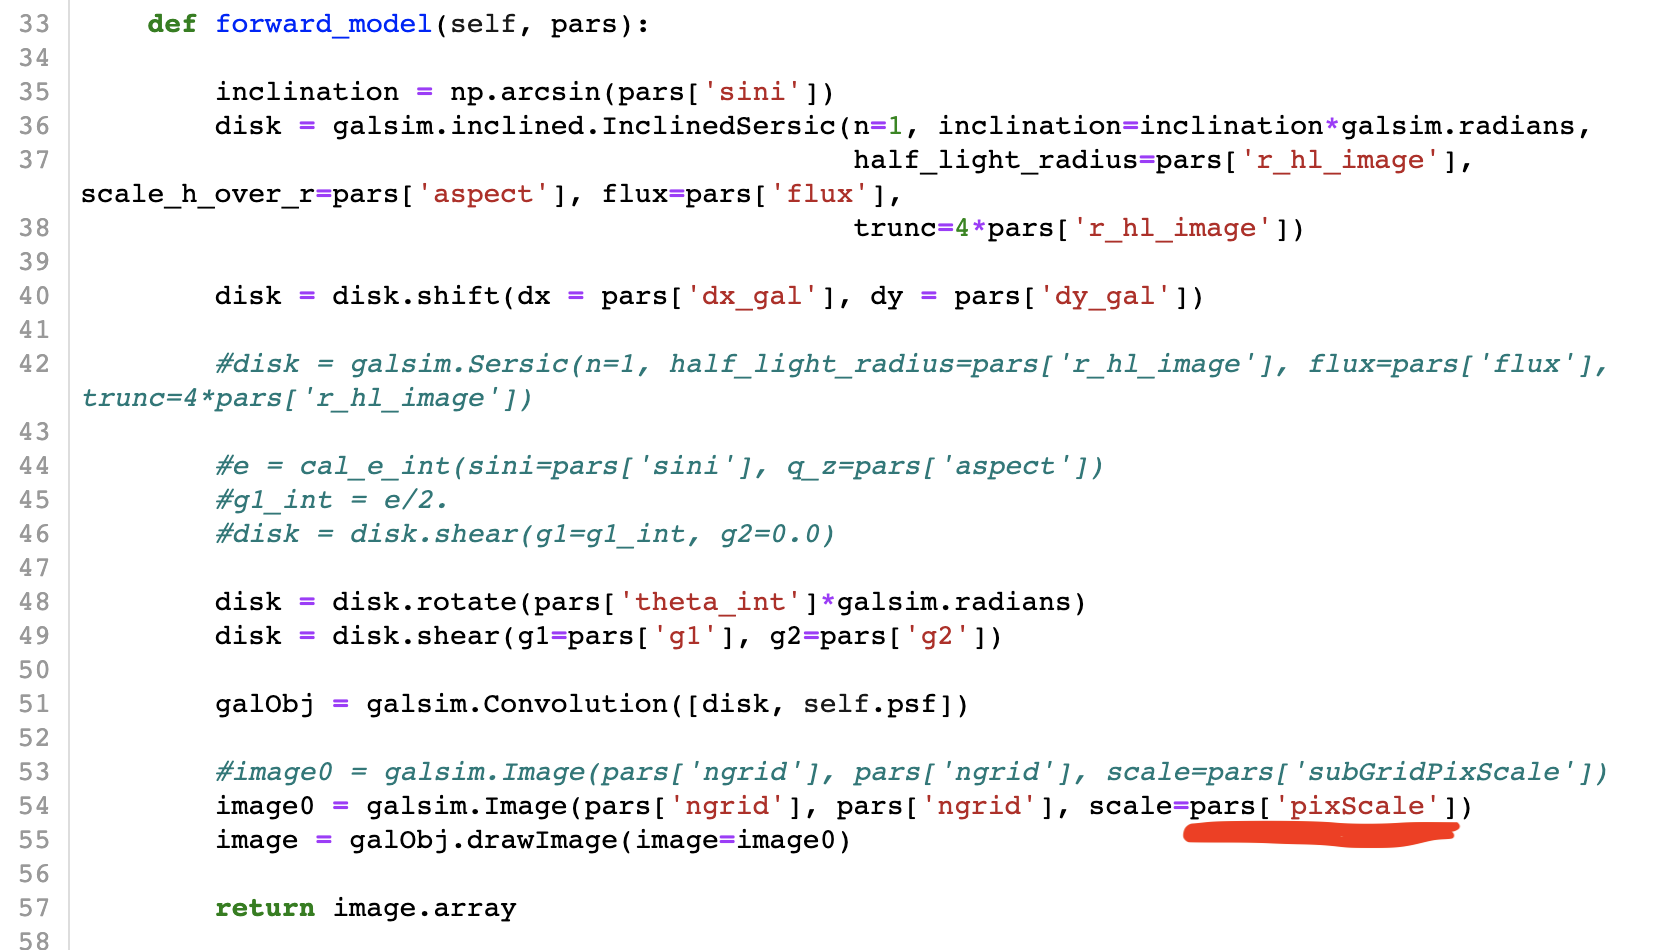

In [72]:
from IPython.display import Image
Image(filename='forward_model_pic.png') 

# III. Shear Tests with Mock Data from tfCube

In [75]:
pars_shear = pars0.copy() 

In [76]:
pars_shear['dx_gal'] = 0.0
pars_shear['dy_gal'] = 0.0

In [80]:
pars_shear['g1'] = 0.2
pars_shear['g2'] = 0.0

In [81]:
dataInfo_shear = gen_mock_tfCube(pars_shear, 'Halpha', slits='major', noise_mode=0)

(<Figure size 324x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc486d32450>)

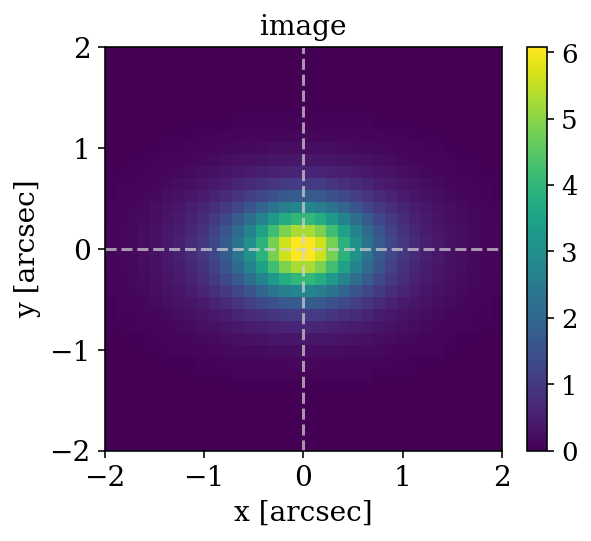

In [82]:
dataInfo_shear['image'].display(xlim=[-2,2])

In [83]:
ImFit_shear = ImageFit(image=dataInfo_shear['image'], par_init = dataInfo_shear['par_fid'])

In [85]:
pars_shear['sini']

0.5

### A) Control; dx_gal + dy_gal not used by MCMC
Note: I have fixed sini because otherwise it was wild.

In [108]:
#active_par_key=['sini', 'r_hl_image', 'theta_int', 'aspect', 'flux']
active_par_key_control=['r_hl_image', 'theta_int', 'flux', 'g1', 'g2']

chainInfo_shear_c = ImFit_shear.run_MCMC(Nwalker=50, Nsteps=1000, active_par_key=active_par_key_control, par_fix={'sini':0.5})

100%|██████████| 1000/1000 [01:19<00:00, 12.57it/s]

Total MCMC time (mins): 1.3267795165379843


In [109]:
Chain_Image_shear_c = ChainTool(chainInfo_shear_c, Nburn=25000, Nend=50000)

In [110]:
Chain_Image_shear_c.par_bestfit(select_par_key=active_par_key_control, statistics='max', mode=0)

{'r_hl_image': [0.49067840936612594, 0.5028088614167047, 0.5107895897232336],
 'theta_int': [None, 1.2470155037233073, None],
 'flux': [513.3530471235105, 523.6488769168637, 532.1070965825426],
 'g1': [None, 0.21669758833421598, None],
 'g2': [None, -0.04751325127558548, None]}

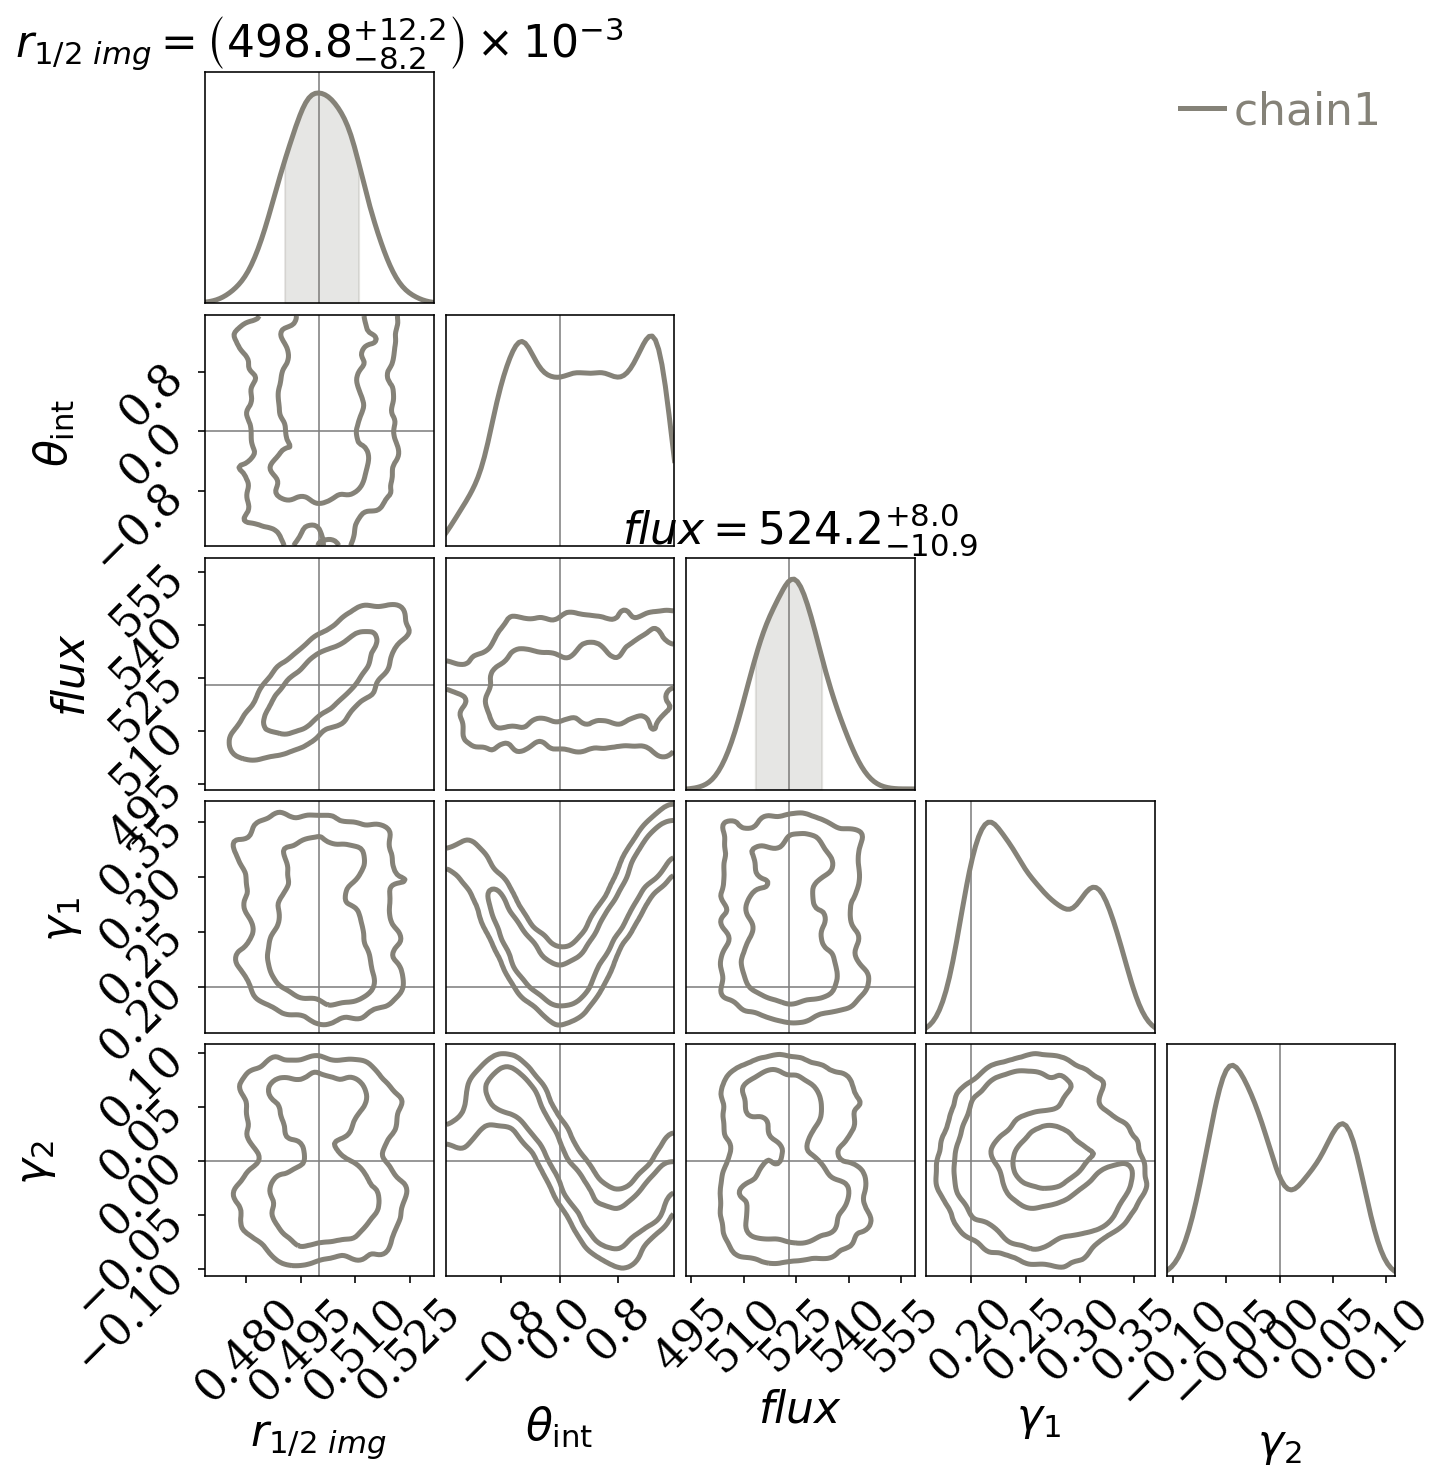

In [111]:
Nchains = 1
colors = [gray, lightblue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '--', "--", "-.", '-', ":", "--", ':']

statistics="max"

#select_par_key = ['sini','r_hl_image','theta_int', 'aspect','flux']
select_par_key = ['r_hl_image','theta_int','flux', 'g1', 'g2']


parID1,parName1,par_x1 = Chain_Image_shear_c.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain_Image_shear_c.chain[:, parID1], parameters=parName1 ,name="$\mathrm{chain1}$")


c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=22,tick_font_size=22
            ,colors=colors
            ,shade=[False]*Nchains
            ,statistics=statistics,summary=True
            ,linestyles=lines
            ,shade_gradient=[0]*Nchains
            ,bar_shade=[True]*Nchains,
           usetex=False)

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
truth_pt = [Chain_Image_shear_c.par_fid[item] for item in ImFit_shear.active_par_key]
fig = c.plotter.plot(legend=True, truth=truth_pt) #, truth=par_x1

fig.subplots_adjust(left=0.12, right=0.99, bottom=0.11, top=0.99)

fig.set_size_inches(2 + fig.get_size_inches())
fig.savefig("fig1.pdf", transparent=True)

### B) Test; dx_gal + dy_gal used by MCMC
Note: I have fixed sini because otherwise it was wild.

In [112]:
#active_par_key=['sini', 'r_hl_image', 'theta_int', 'aspect', 'flux']
active_par_key_test=['r_hl_image', 'theta_int', 'flux', 'g1', 'g2', 'dx_gal', 'dy_gal']

chainInfo_shear_t = ImFit_shear.run_MCMC(Nwalker=50, Nsteps=1000, active_par_key=active_par_key_test, par_fix={'sini':0.5})

100%|██████████| 1000/1000 [01:20<00:00, 12.44it/s]

Total MCMC time (mins): 1.3410220861434936


In [113]:
Chain_Image_shear_t = ChainTool(chainInfo_shear_t, Nburn=25000, Nend=50000)

In [114]:
Chain_Image_shear_t.par_bestfit(select_par_key=active_par_key_test, statistics='max', mode=0)

{'r_hl_image': [0.489228873133451, 0.4967266478665303, 0.5086472291946419],
 'theta_int': [None, 0.48076525944378545, None],
 'flux': [512.3573765439111, 519.3167934286598, 529.6665426827768],
 'g1': [None, 0.20969870422522868, None],
 'g2': [None, -0.056811976096171404, None],
 'dx_gal': [-0.005174062525134103, 0.000171110755651422, 0.007884911791865075],
 'dy_gal': [-0.005033244319931681,
  6.696391149551076e-05,
  0.0065604409478655645]}

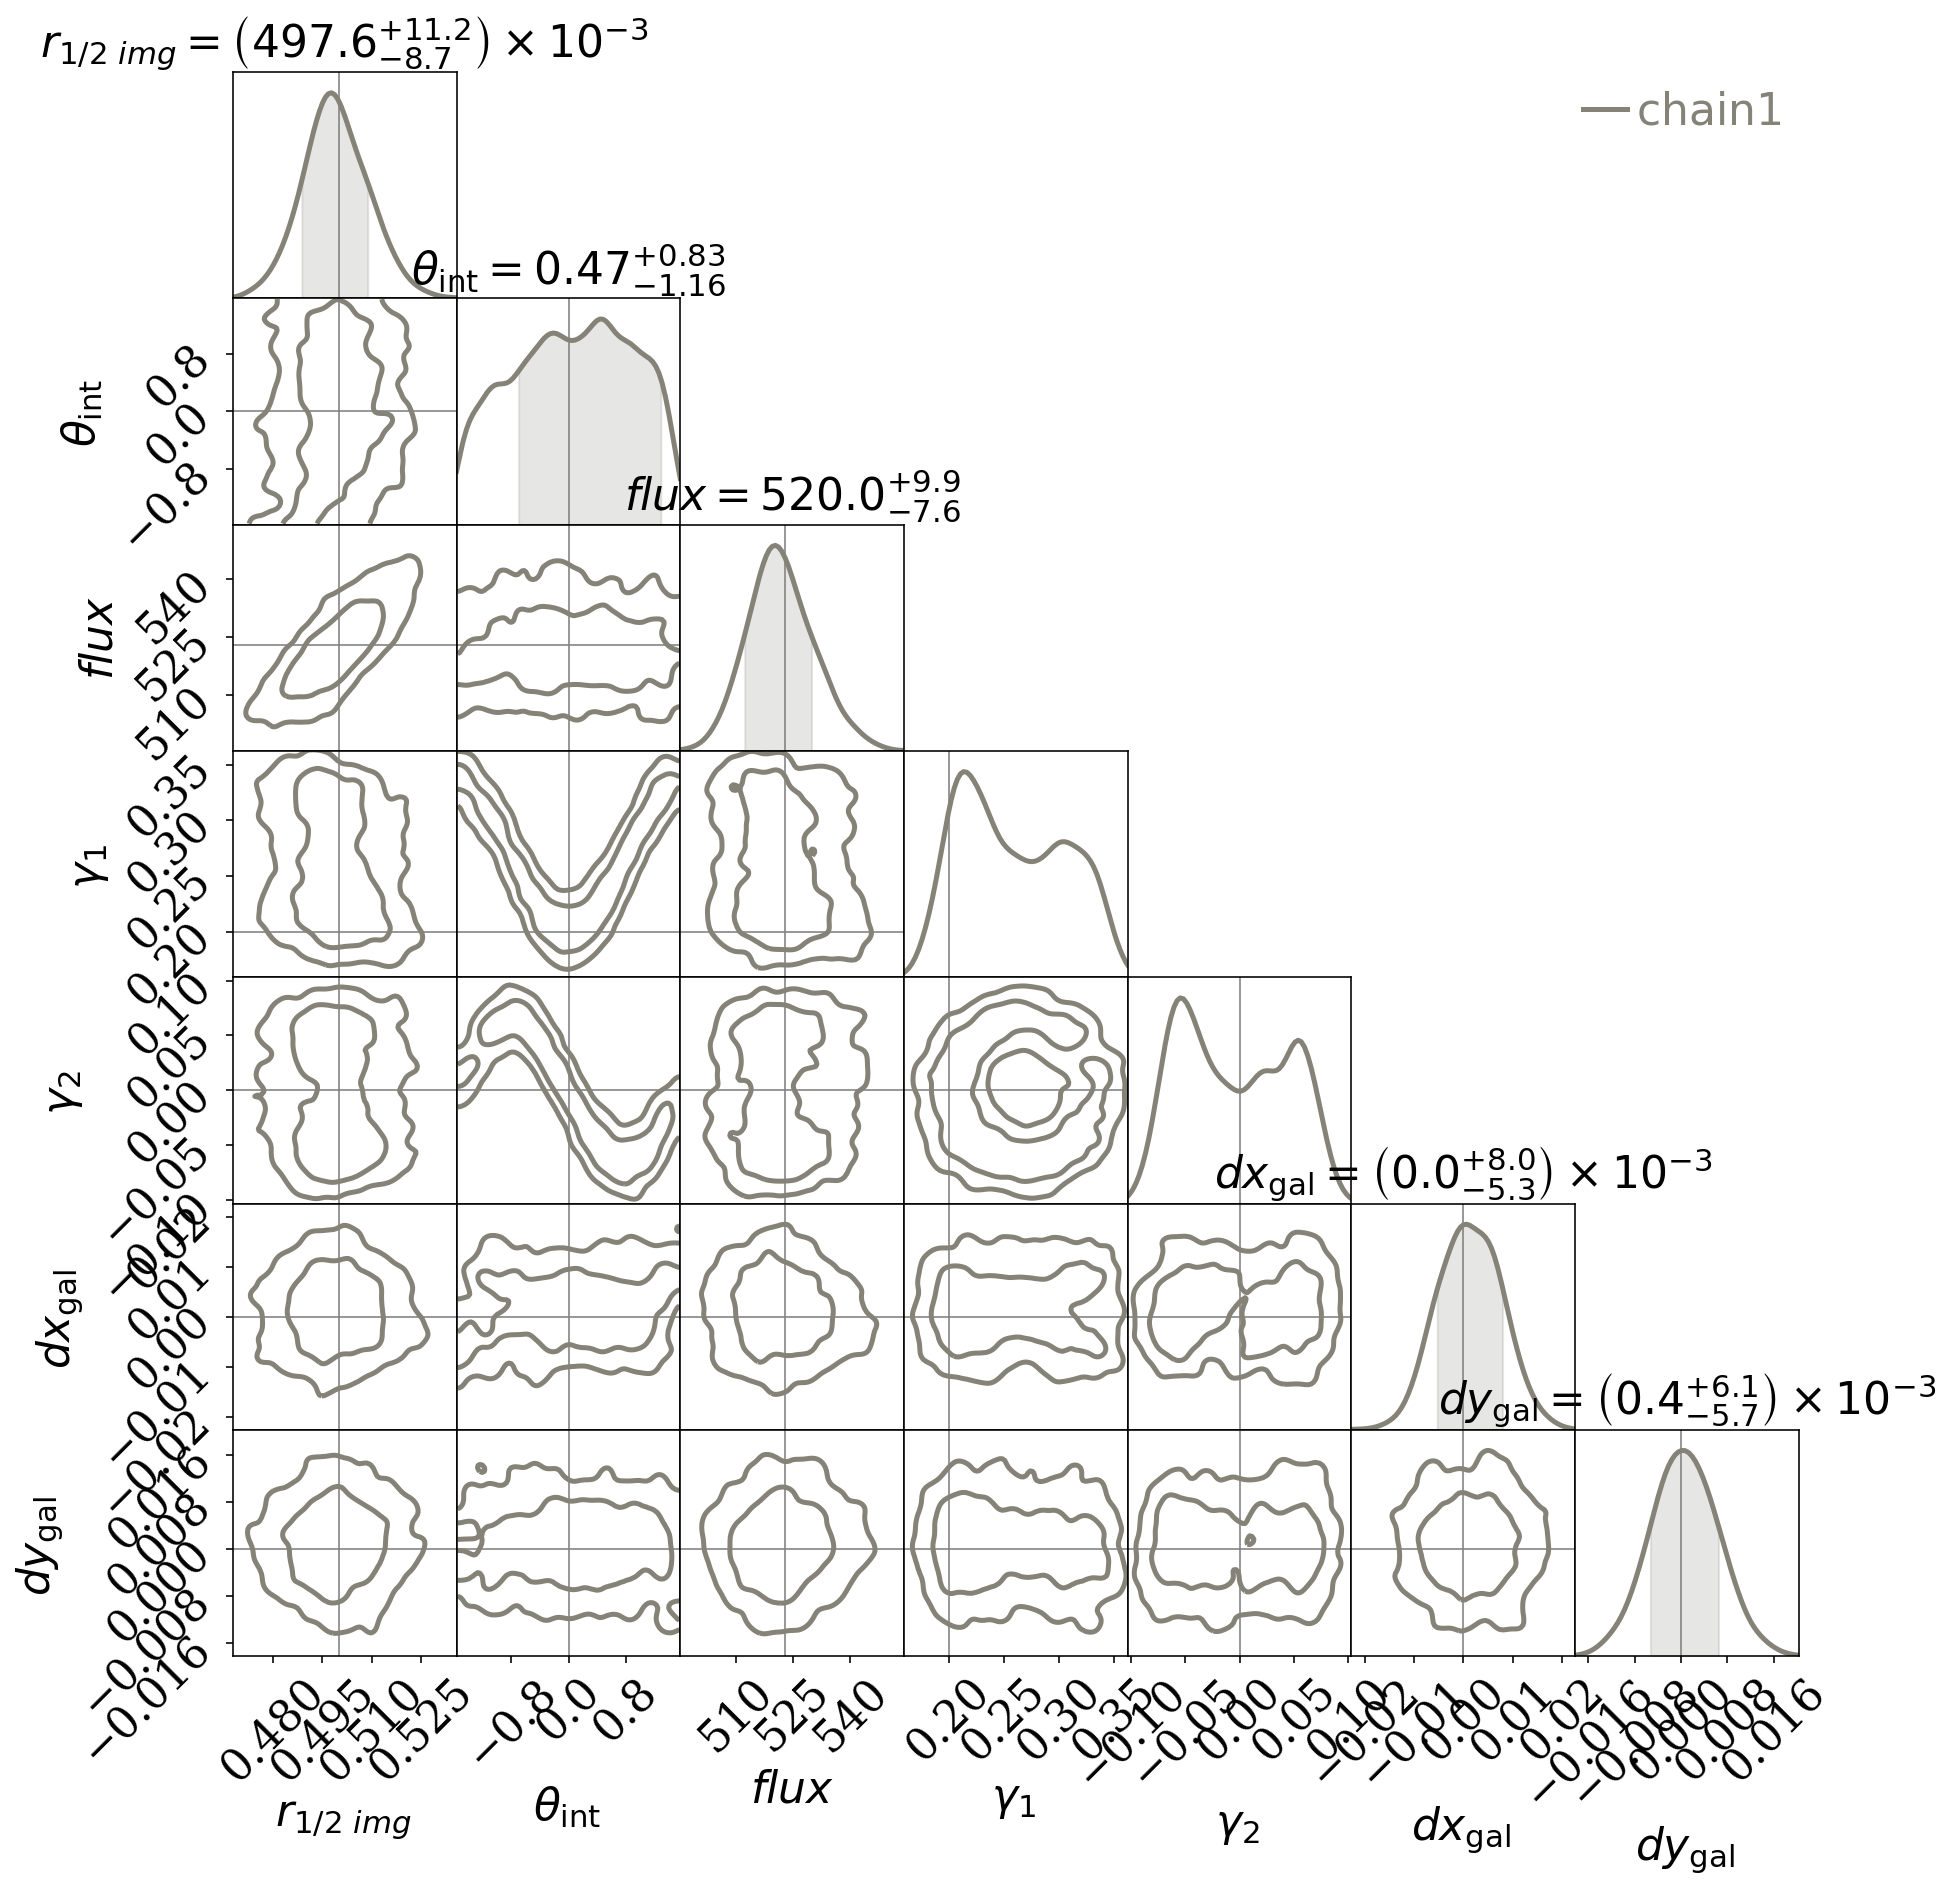

In [115]:
Nchains = 1
colors = [gray, lightblue, red, yellow, blue, yellowgreen, green, green, black]
lines = ["-", '--', "--", "-.", '-', ":", "--", ':']

statistics="max"

#select_par_key = ['sini','r_hl_image','theta_int', 'aspect','flux']
select_par_key = ['r_hl_image','theta_int','flux', 'g1', 'g2', 'dx_gal', 'dy_gal']


parID1,parName1,par_x1 = Chain_Image_shear_t.select_par_info(select_par_key)

c = ChainConsumer()
c.add_chain(Chain_Image_shear_t.chain[:, parID1], parameters=parName1 ,name="$\mathrm{chain1}$")


c.configure(linewidths=2.5,sigmas=np.array([0,1,2]),bins=0.5,sigma2d=False,label_font_size=22,tick_font_size=22
            ,colors=colors
            ,shade=[False]*Nchains
            ,statistics=statistics,summary=True
            ,linestyles=lines
            ,shade_gradient=[0]*Nchains
            ,bar_shade=[True]*Nchains,
           usetex=False)

c.configure_truth(color="gray",lw=1,ls="-",alpha=0.8, zorder=-1)
truth_pt = [Chain_Image_shear_t.par_fid[item] for item in ImFit_shear.active_par_key]
fig = c.plotter.plot(legend=True, truth=truth_pt) #, truth=par_x1

fig.subplots_adjust(left=0.12, right=0.99, bottom=0.11, top=0.99)

fig.set_size_inches(2 + fig.get_size_inches())
fig.savefig("fig1.pdf", transparent=True)

While still not great, theta_int is constrained now (while it wasn't for the control case). The walkers foound the correct values for dx_gal and dy_gal. To my untrained eye, things seem better?